#Recommendation system for crop

## Upload data

In [1]:
#Uploading local file
from google.colab import files

uploaded = files.upload()

Saving Crop_recommendation.csv to Crop_recommendation.csv


## Dependencies

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

## Objetives and goals

This dataset contains information on the levels of nitrogen, phosphorus, and potassium in soil, as well as temperature, humidity, pH, and rainfall, and their impact on the growth of crops. The data can be used to make data-driven recommendations for achieving optimal nutrient and environmental conditions to improve crop yield.

## Data Exploration and Analysis

### Descriptive Analysis

In [4]:
# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('Crop_recommendation.csv')

In [5]:
# Mostrar las primeras filas del DataFrame para verificar que se cargó correctamente
df.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   phosphorus   2200 non-null   int64  
 2   potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
dtypes: float64(6), int64(3), object(1)
memory usage: 172.0+ KB


Podemos observar que hay una presencia de dos columnas con datos nulos. Por otro lado, los datos de las demás columnas se presentan sin datos faltantes, preparados para el uso.

Los datos son de tipo numérico, los cuales apuntan a un 'label' que es el tipo de cultivo al que hace referencia.

In [7]:
#Drop unused columns
df.drop(['Unnamed: 8', 'Unnamed: 9'], axis=1, inplace=True)

In [8]:
df['label'].value_counts()

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


Las variables objetivos están perfectamente balanceadas, todas cuentan con 100 valores.

### Data visualization

#### Visualizing distributions of data

An early step in any effort to analyze or model data should be to understand how the variables are distributed. Techniques for distribution visualization can provide quick answers to many important questions. What range do the observations cover? What is their central tendency? Are they heavily skewed in one direction? Is there evidence for bimodality? Are there significant outliers? Do the answers to these questions vary across subsets defined by other variables?



> https://seaborn.pydata.org/tutorial/distributions.html


Distribution of data for each colum grouped by crop

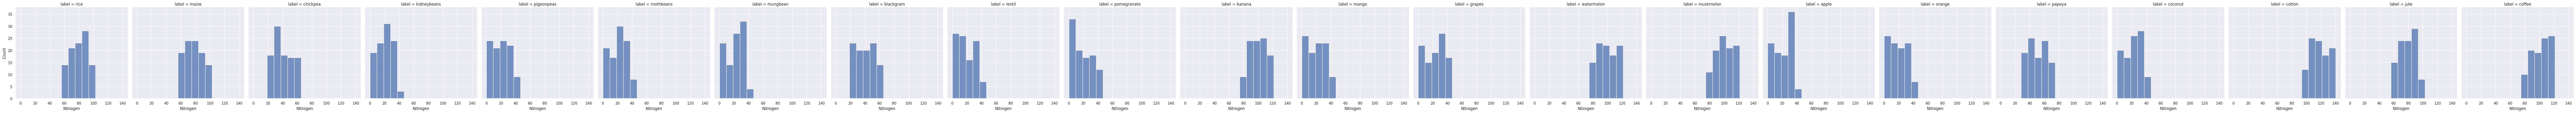

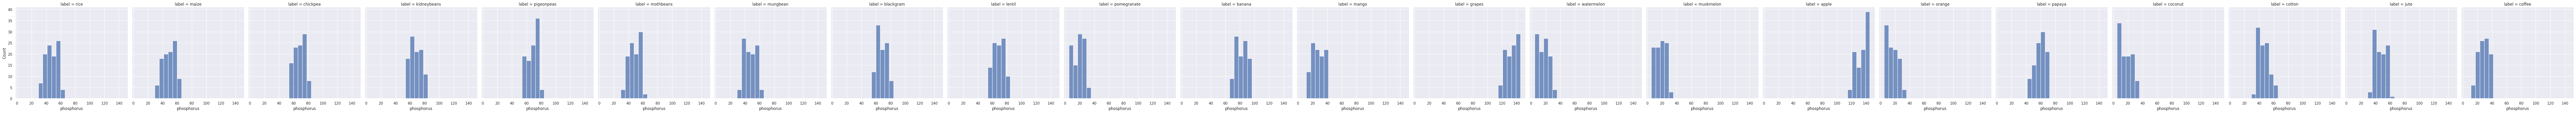

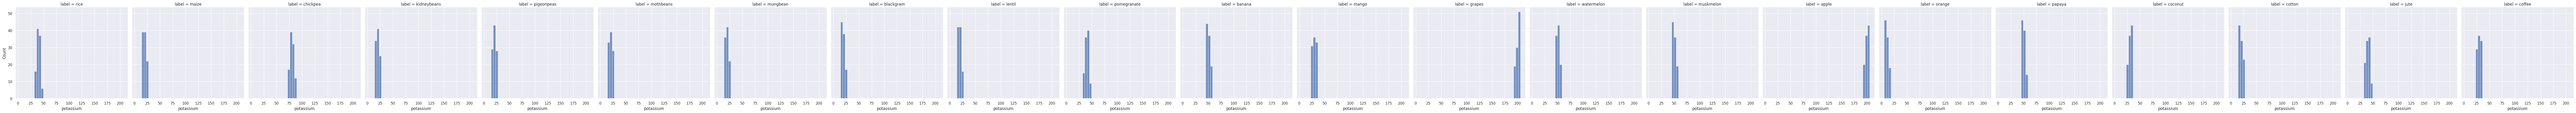

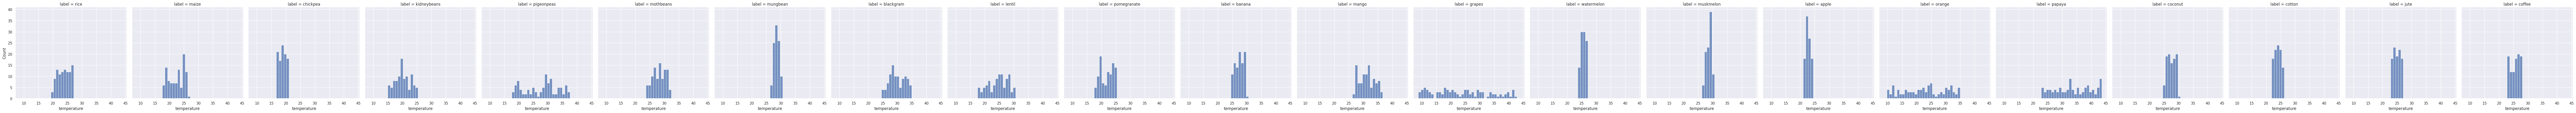

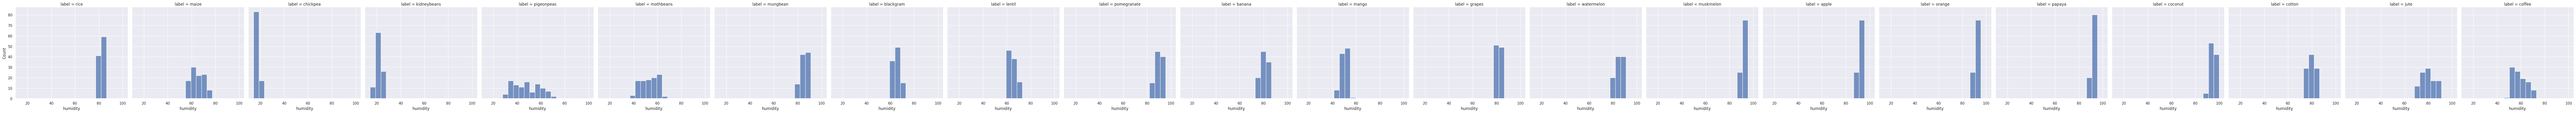

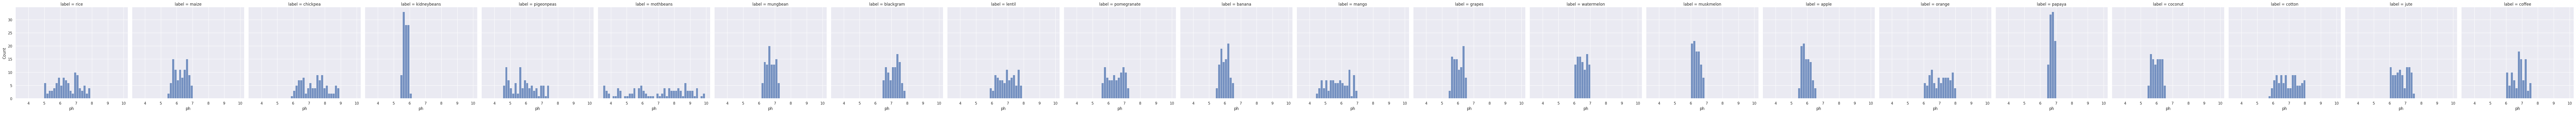

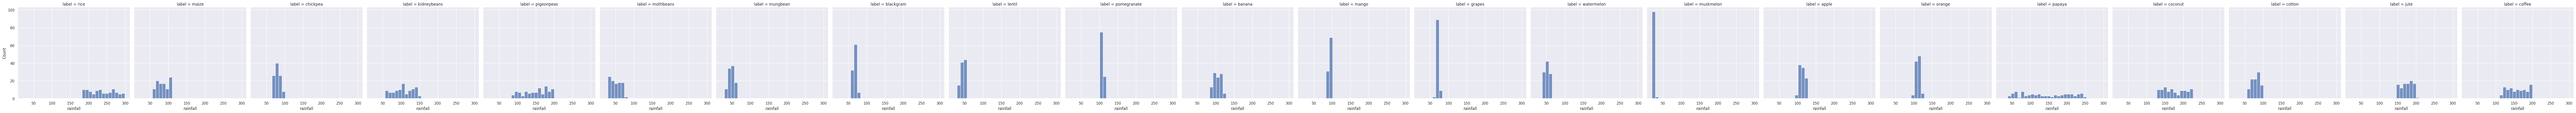

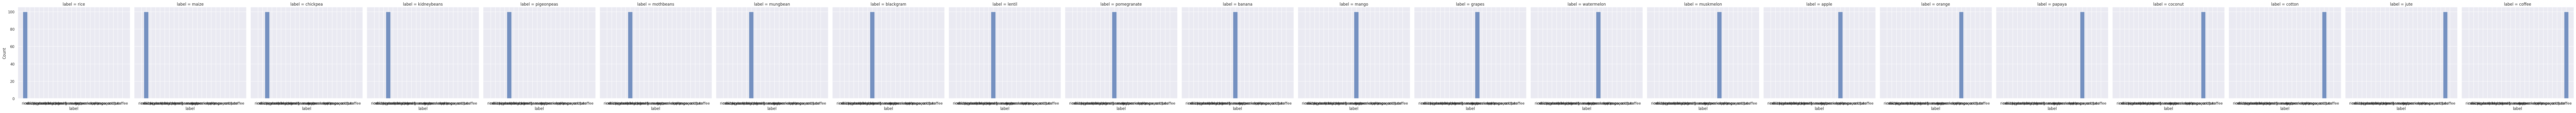

In [ ]:
columns = df.columns
for colum in columns:
  sns.displot(df, x=colum, col='label')

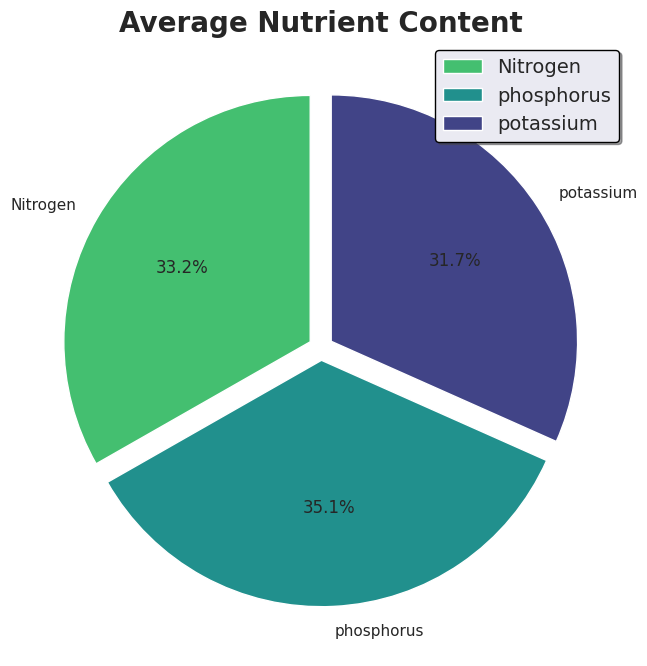

In [ ]:
colors = cm.viridis_r([0.3, 0.5, 0.8])

fig, ax = plt.subplots(figsize = (8, 8))
nutrients = ['Nitrogen', 'phosphorus', 'potassium']
sizes = [df['Nitrogen'].mean(), df['phosphorus'].mean(), df['potassium'].mean()]

explode = [0.05, 0.05, 0.05]
ax.pie(sizes, labels = nutrients, colors = colors, autopct = '%1.1f%%', startangle = 90, explode = explode)
ax.set_title('Average Nutrient Content', fontsize = 20, fontweight = 'bold')
ax.legend(fontsize = 14, loc = 'best', frameon = True, edgecolor = 'black', shadow = True)

plt.show()

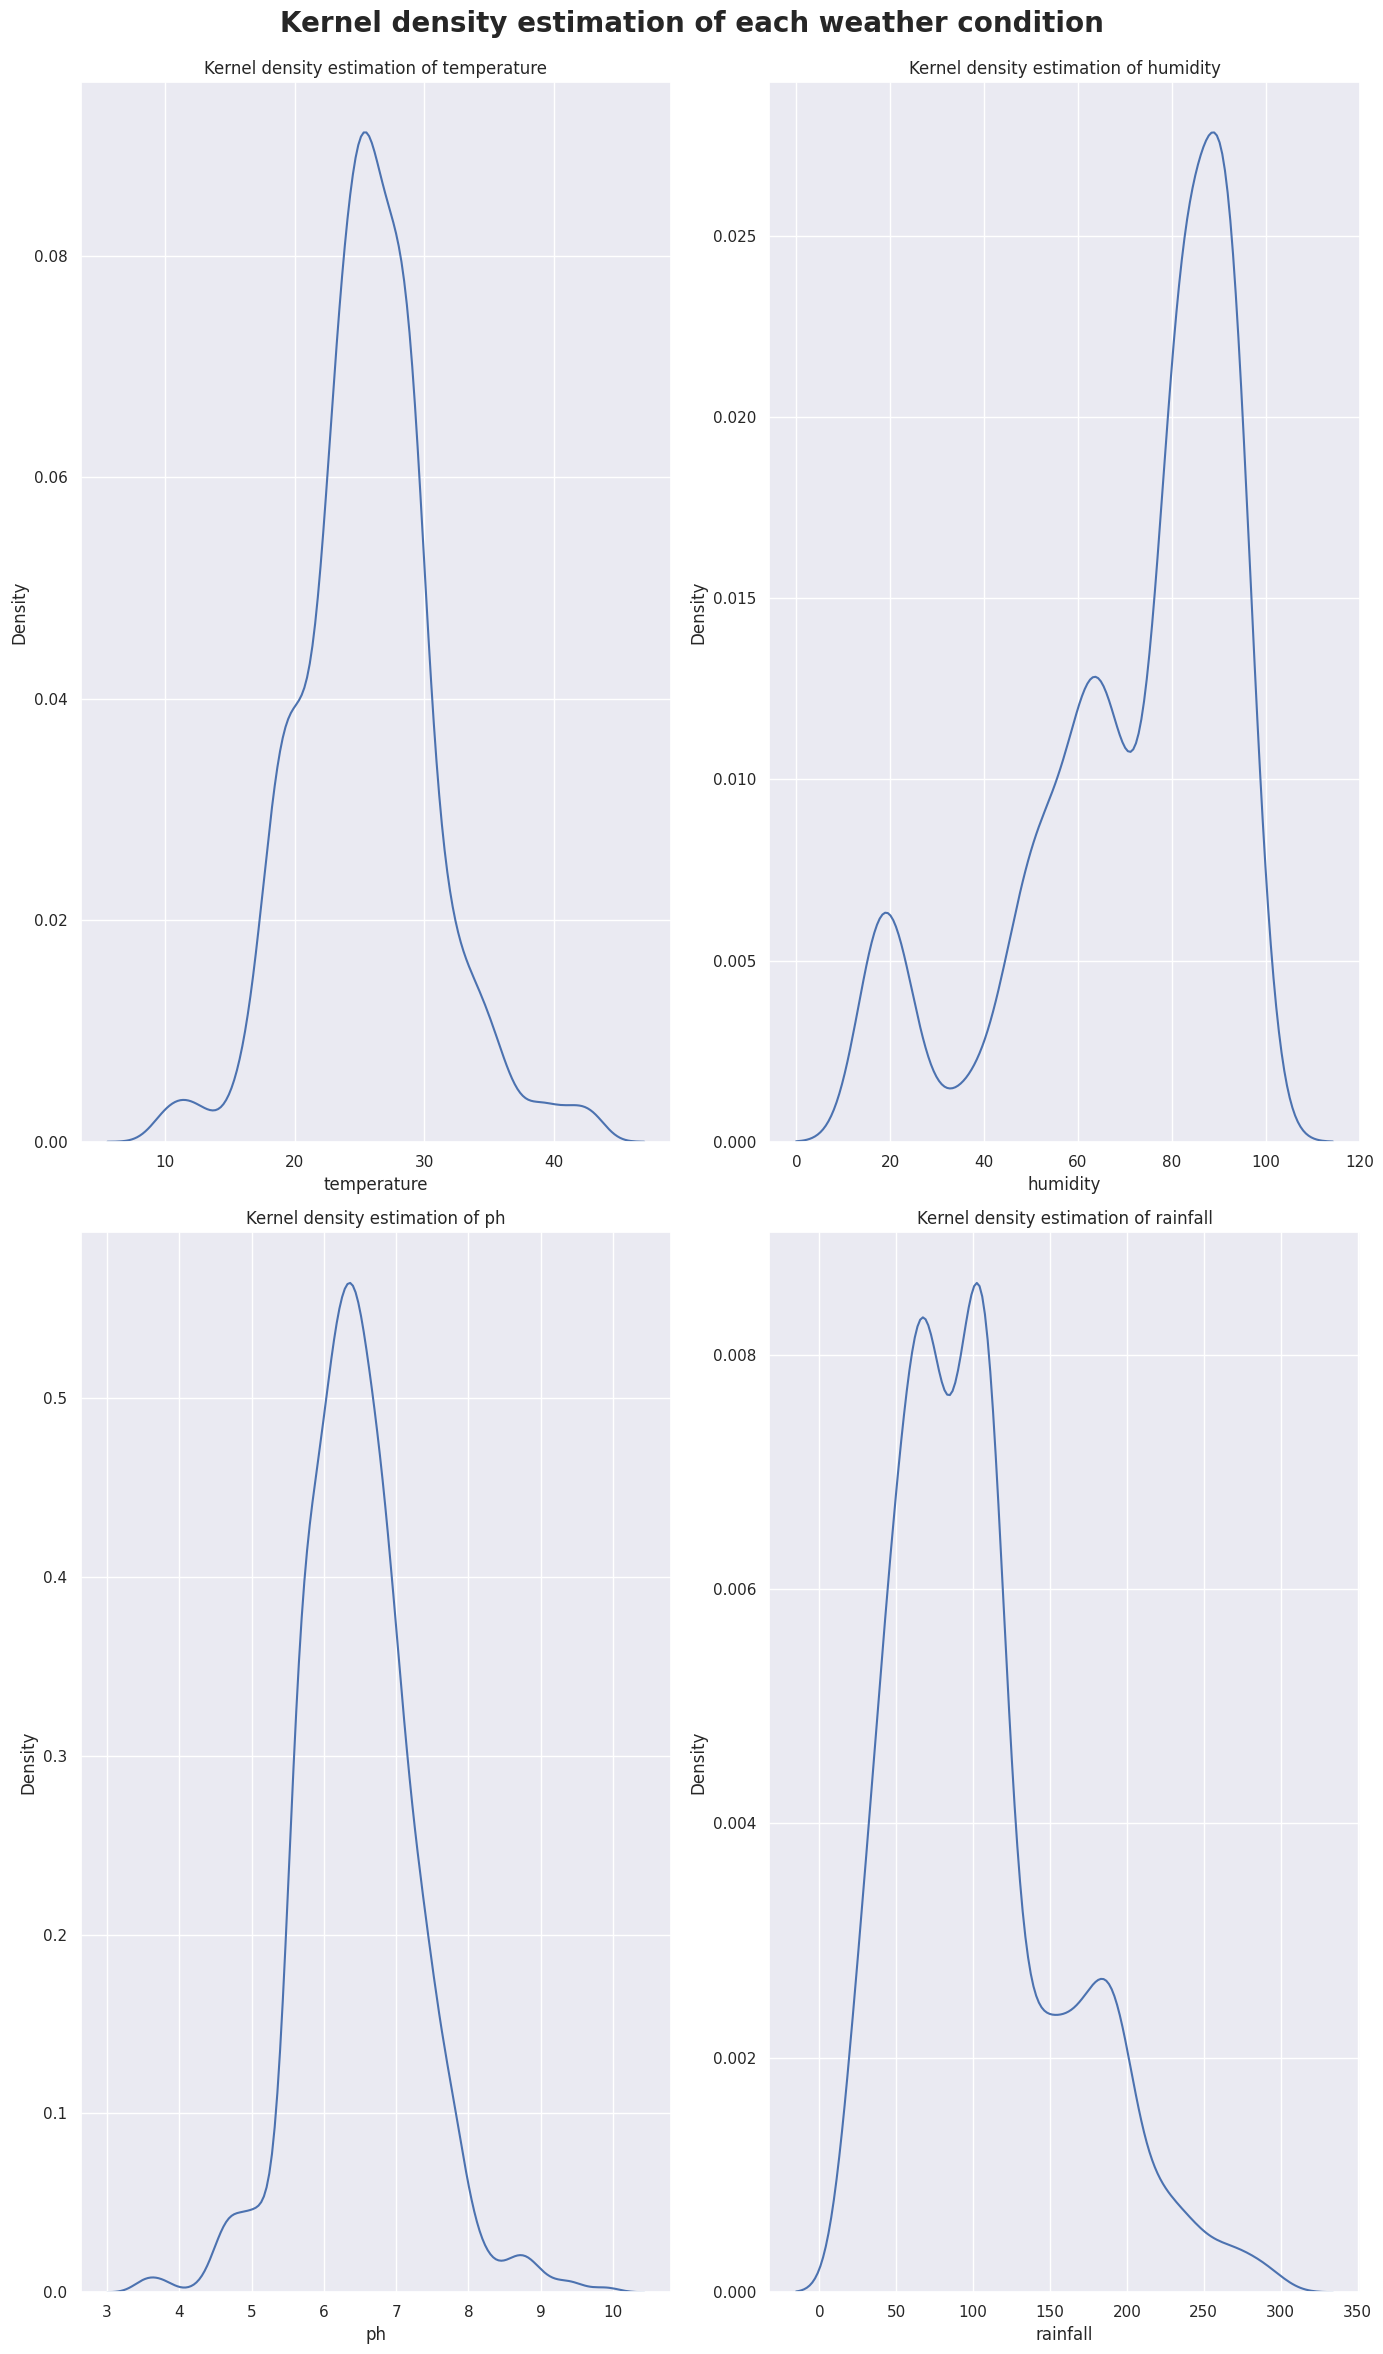

In [ ]:
conditions = ['temperature', 'humidity', 'ph','rainfall']
sizes = [df['temperature'].mean(), df['humidity'].mean(), df['ph'].mean(), df['rainfall'].mean()]

# Configuramos la cuadrícula de subgráficos
fig, axs = plt.subplots(2, 2, figsize = (14, 24))


# Dibujamos los gráficos KDE en cada subgráfico
sns.kdeplot(data=df[conditions[0]], ax=axs[0, 0])
sns.kdeplot(data=df[conditions[1]], ax=axs[0, 1])
sns.kdeplot(data=df[conditions[2]], ax=axs[1, 0])
sns.kdeplot(data=df[conditions[3]], ax=axs[1, 1])

# Añadir títulos a cada subgráfico
axs[0, 0].set_title('Kernel density estimation of ' + conditions[0])
axs[0, 1].set_title('Kernel density estimation of ' + conditions[1])
axs[1, 0].set_title('Kernel density estimation of ' + conditions[2])
axs[1, 1].set_title('Kernel density estimation of ' + conditions[3])

#Colocamos el título general
fig.suptitle('Kernel density estimation of each weather condition', fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.subplots_adjust(top = 0.95)

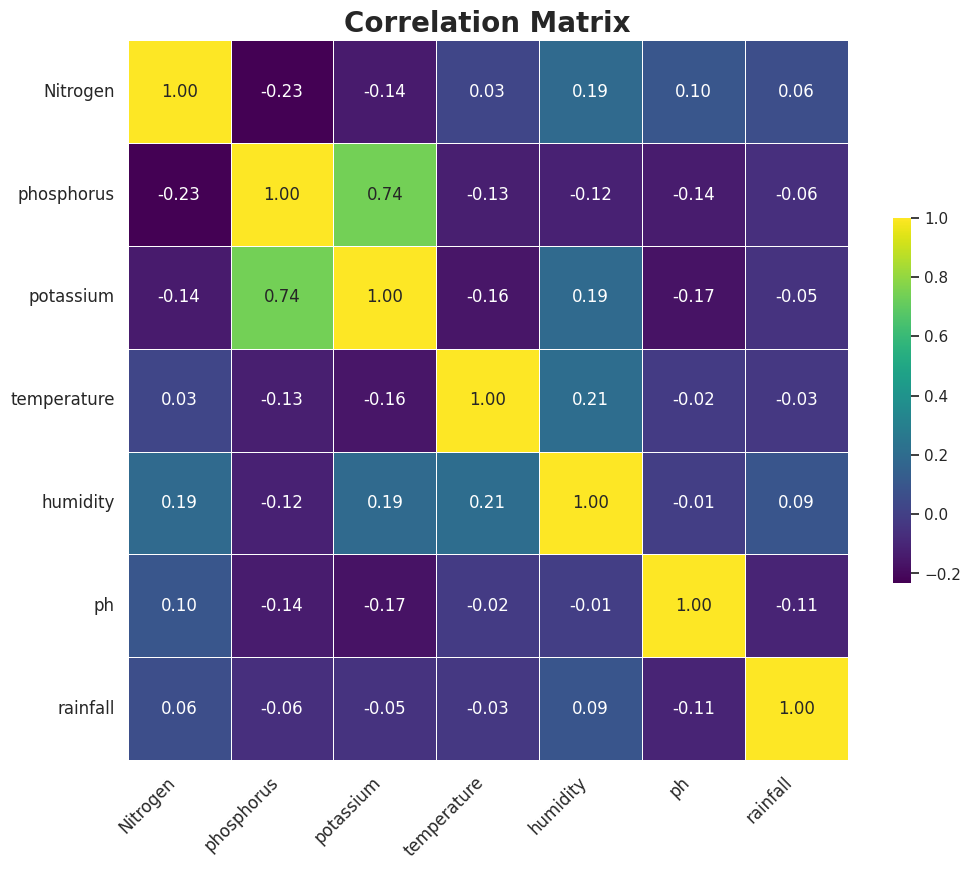

In [ ]:
# Seleccionamos todas las columnas menos 'label'
df_values = df.drop(columns=['label'])

corr_matrix = df_values.corr()
fig, ax = plt.subplots(figsize = (12, 10))
heatmap = sns.heatmap(corr_matrix, cmap = "viridis", annot = True,
                      fmt = ".2f", square = True, linewidths = .5, cbar_kws = {"shrink": .5}, ax = ax)

heatmap.set_title("Correlation Matrix", fontsize = 20, fontweight = 'bold')
plt.subplots_adjust(left = 0.15, bottom = 0.15)
ax.tick_params(labelsize = 12)

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 45, ha = 'right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation = 0, ha = 'right')
plt.show()

Podemos observar a simple vista una presencia de correlación positiva en la presencia de potasio y fósforo en los cultivos, lo cual nos puede indicar que un cultivo que tenga uno probablemente tenga el otro.

#### Visualizing statistical relationships

Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables. Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.



> https://seaborn.pydata.org/tutorial/relational.html#relating-variables-with-scatter-plots



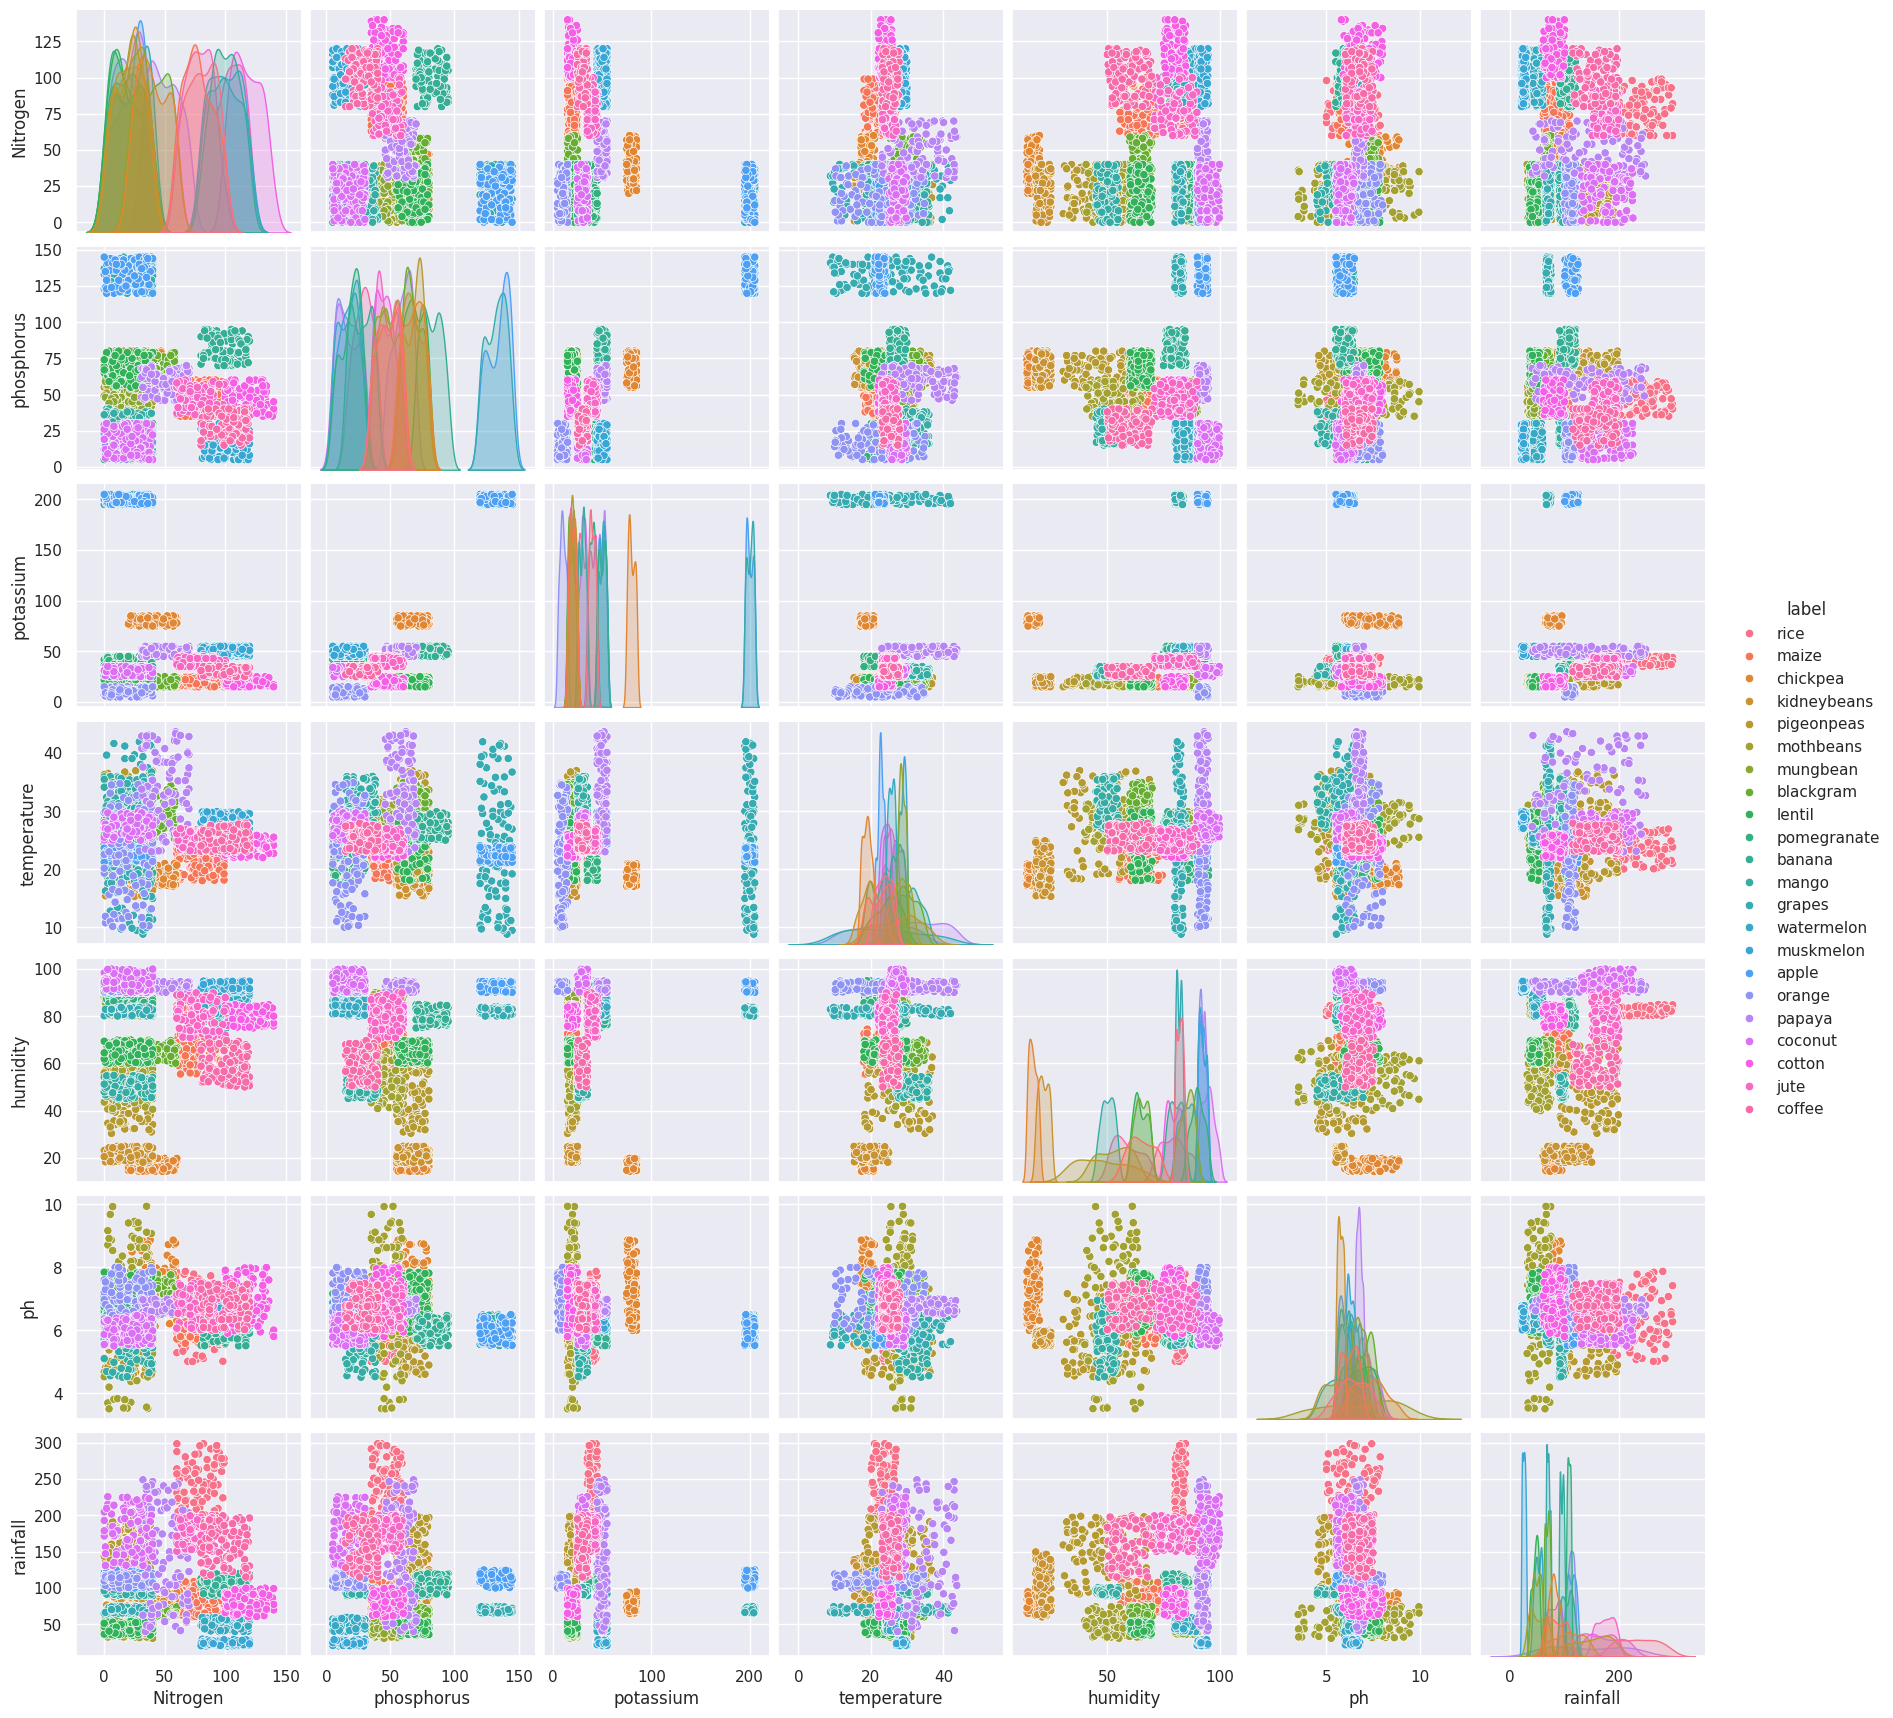

In [ ]:
sns.set_theme(style="darkgrid")
sns.pairplot(data=df, hue='label')

Se puede observar que cultivos del mismo tipo presentan unas ciertas condiciones iguales siempre, dentro de unos intervalos, los cuales nos pueden ayudar a saber las cantidades óptimas de nutrientes y condiciones ambientales para cada cultivo en cuestión.

## Data preprocessing

In [9]:
# Features
X = df.drop('label', axis = 1)
# Labels
y = df['label']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Model selection

Opciones de modelos a elegir:

**Modelos de Aprendizaje Supervisado:**

* Regresión: Para predecir rendimientos de cultivos basados en condiciones actuales.
* Clasificación: Para recomendar el mejor tipo de cultivo a plantar.
* Algoritmos populares: Regresión lineal, Regresión logística, Random Forest, Gradient Boosting, Support Vector Machines (SVM).

**Modelos de Aprendizaje No Supervisado:**

* Clustering: Para agrupar regiones o condiciones similares.
* Algoritmos populares: K-means, DBSCAN.

En este caso con los tipos de datos que contamos, vamos a implementar un sistema de clasificación para, basado en las condiciones que contemos actualmente, se nos recomiende que cultivo es el óptimo.

###### **Metrics for test the model:**

* Accuracy shows how often a classification ML model is correct overall.
* Precision shows how often an ML model is correct when predicting the target class.
* Recall shows whether an ML model can find all objects of the target class.

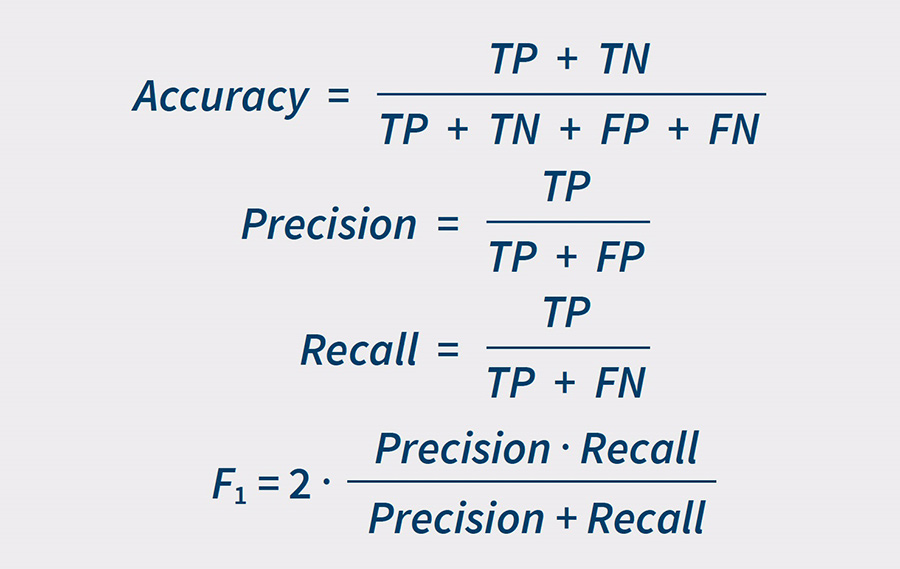

Debido a que no contamos con clases desbalanceadas, vamos a utilizar principalmente la exactitud o 'Accuracy' del modelo.

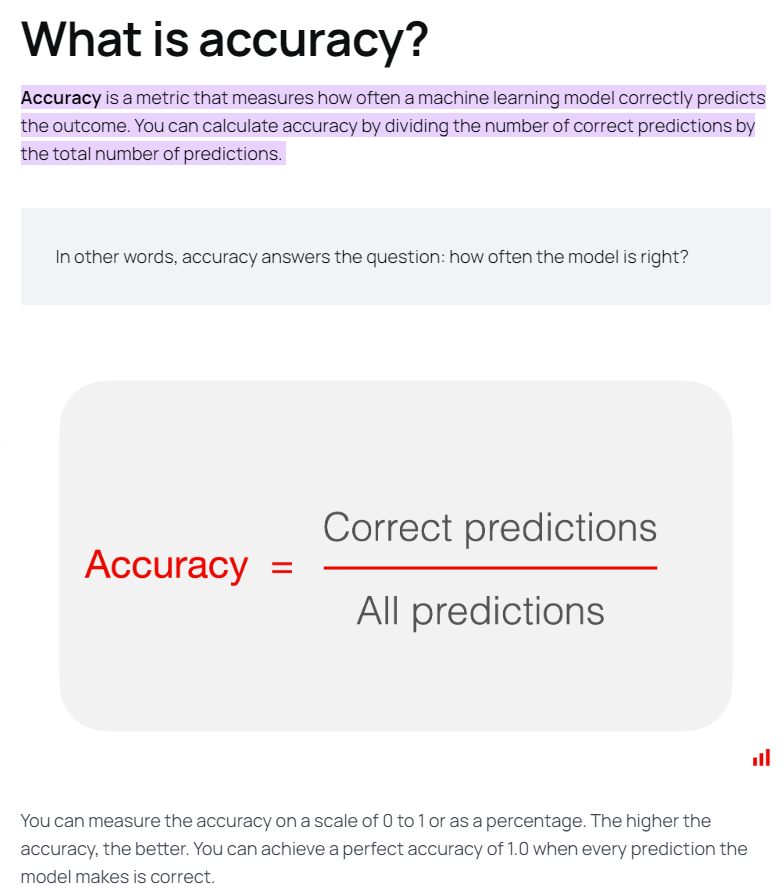

##### Option 1: SVM

In [23]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, Y_train)

SVC()

In [24]:
pred = clf.predict(X_test)
acuraccy = accuracy_score(Y_test, pred)
print('Accuracy: %f' % acuraccy)

Accuracy: 0.977273


In [25]:
print('Classification Report for SVM')
print('--------------------------------------------------')
print(classification_report(Y_test, pred))

Classification Report for SVM
--------------------------------------------------
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.96      1.00      0.98        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       0.78      1.00      0.88        21
 kidneybeans       0.87      1.00      0.93        20
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      0.96      0.98        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23


Implementando un SVM, podemos obtener (sin tunning) un Accuracy **del** 0.97%

In [27]:
# Guardamos el modelo
joblib.dump(clf, 'SVM-V1.0.joblib')

['SVM-V1.0.joblib']

##### Option 2: Desicion Trees

In [28]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [30]:
pred = clf.predict(X_test)
acuraccy = accuracy_score(Y_test, pred)
print('Accuracy: %f' % acuraccy)

Accuracy: 0.988636


In [31]:
print('Classification Report for Decision Tree')
print('--------------------------------------------------')
print(classification_report(Y_test, pred))

Classification Report for Decision Tree
--------------------------------------------------
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      0.95      0.98        22
    chickpea       0.92      1.00      0.96        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       0.95      0.95      0.95        21
 kidneybeans       1.00      0.90      0.95        20
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.96      1.00      0.98        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00 

Implementando un Decision Tree, podemos obtener (sin tunning) un Accuracy **del** 0.99%

In [32]:
# Guardamos el modelo
joblib.dump(clf, 'DT-V1.0.joblib')

['DT-V1.0.joblib']

##### Option 3: Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=10)

In [34]:
pred = clf.predict(X_test)
acuraccy = accuracy_score(Y_test, pred)
print('Accuracy: %f' % acuraccy)

Accuracy: 0.997727


In [35]:
print('Classification Report for Random Forest Classifier')
print('--------------------------------------------------')
print(classification_report(Y_test, pred))

Classification Report for Random Forest Classifier
--------------------------------------------------
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       0.95      1.00      0.98        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      1.00      1.00        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00

Implementando un Random Forest, podemos obtener (con un poco de ajuste de hiperparámetros) un Accuracy **del** 0.99%

In [36]:
# Guardamos el modelo
joblib.dump(clf, 'RF-V1.0.joblib')

['RF-V1.0.joblib']

## Deploy the model

Para el despliegue vamos a elegir el modelo con mejor rendimiento en la métrica que nos importa en esta caso de uso que es Accuracy, por la cual vamos a desplegar el RandomForest Classifier

Empezamos reconociendo entre que variables el usuario puede hacer una consulta para predecir el cultivo

In [50]:
# Extraemos las columnas
columns = X.columns

for column in columns:
  min_value = df[column].min()
  max_value = df[column].max()
  print(f"El valor mínimo de la variable {column} es: {min_value}")
  print(f"El valor máximo de la variable {column} es: {max_value}")
  print('')

El valor mínimo de la variable Nitrogen es: 0
El valor máximo de la variable Nitrogen es: 140

El valor mínimo de la variable phosphorus es: 5
El valor máximo de la variable phosphorus es: 145

El valor mínimo de la variable potassium es: 5
El valor máximo de la variable potassium es: 205

El valor mínimo de la variable temperature es: 8.825674745
El valor máximo de la variable temperature es: 43.67549305

El valor mínimo de la variable humidity es: 14.25803981
El valor máximo de la variable humidity es: 99.98187601

El valor mínimo de la variable ph es: 3.504752314
El valor máximo de la variable ph es: 9.93509073

El valor mínimo de la variable rainfall es: 20.21126747
El valor máximo de la variable rainfall es: 298.5601175



####  Se desplegará el model usando FastAPI para crear una api para que el modelo cree predicciones y se lo contenerizará para poder acceder al modelo mediante Docker, los pasos a seguir se encontrarán en el archivo README